In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Excercise on TOC

For this case study we will create an hypothetical process with 4 machines.<br>
We will then calculate for some scenarios the following variables:
- output for the system
- work in process
- cost for each machine
- efficiency for each machine

Cost will be calculated assigning arbitrary numbers for each processed unit.
Efficiency will be calculated as maximum capacity divided by actual productivity.

Below there is a picture of the process we will use to make this example.<br>
The raw material moves from left to right. The arrows are self explanatory.<br>

#### Assumptions:
- There is no thing such as deffects or rework.
- The time base for the machines is not relevant for the excercise.
- Each productivity for each machine has a distribution of possible values. (Equal for both scenarios)

#### Simulation:
For each time unit, we will run a simulation to get the maximum theoretical capacity for each machine in that specific time.

For the first excercise we will assume that each machine produces the maximum possible, regardless whatever might be happening in any other machine.
The maximum possible will be it's own capacity at that time, or its input work in process, whichever is the lowest.(of course).

For the second excercise we will assume that each machine produces the minimum needed to keep the constraint working at its maximum possible level. The constraint for this case will be predetermined. We chose machine D.

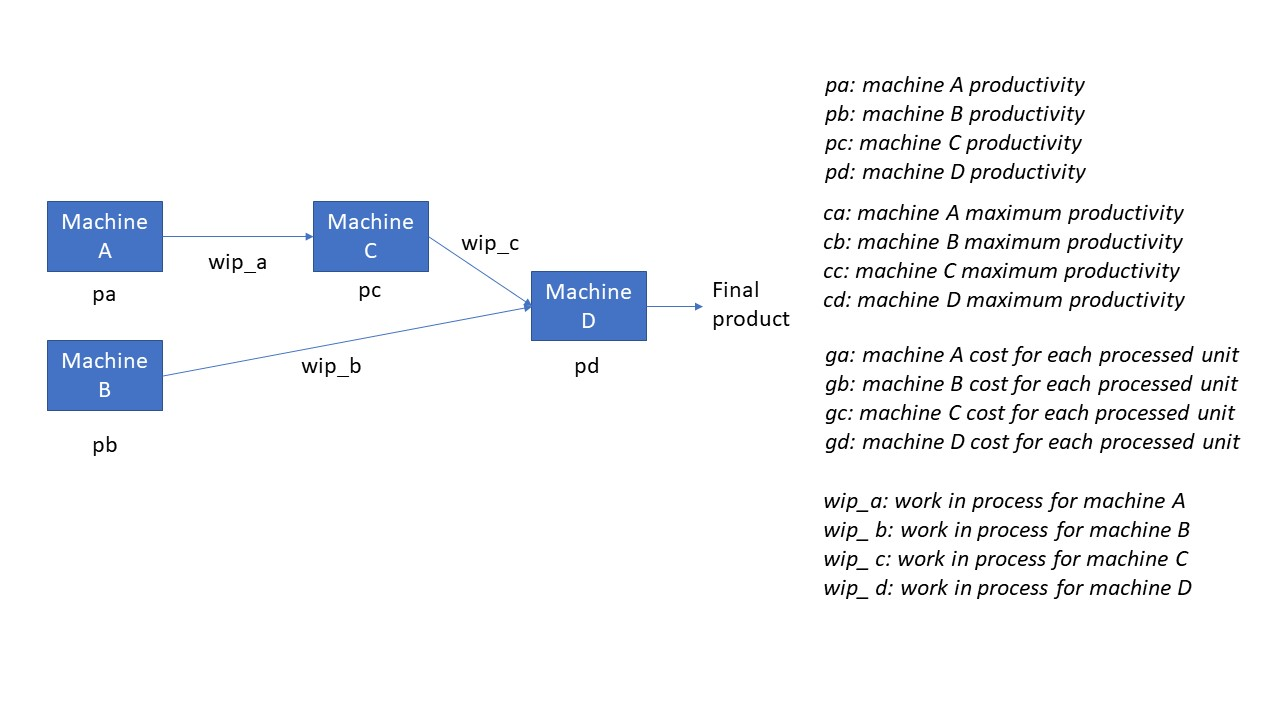

#### Productivity Distributions for each Machine

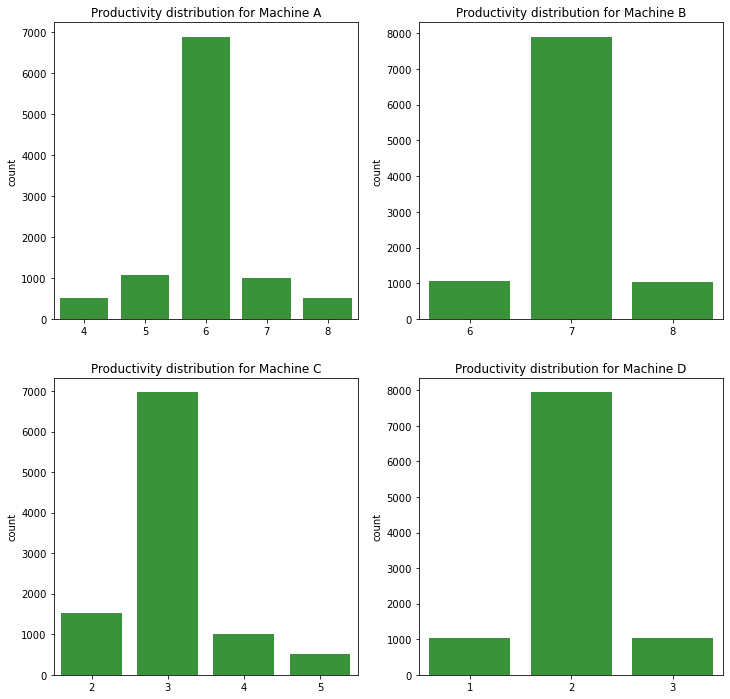

In [39]:
ca = np.random.choice(np.arange(4,9), p = [0.05, 0.1, 0.7, 0.1, 0.05], size = 10000)
cb = np.random.choice(np.arange(6,9), p = [0.1, 0.8, 0.1], size = 10000)
cc = np.random.choice(np.arange(2,6), p = [0.15, 0.7, 0.1, 0.05], size = 10000)
cd = np.random.choice(np.arange(1,4), p = [0.1, 0.8, 0.1], size = 10000)

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('Productivity distribution for Machine A')
sb.countplot(x = ca, color = sb.color_palette()[2])

plt.subplot(2,2,2)
plt.title('Productivity distribution for Machine B')
sb.countplot(x = cb, color = sb.color_palette()[2])

plt.subplot(2,2,3)
plt.title('Productivity distribution for Machine C')
sb.countplot(x = cc, color = sb.color_palette()[2])

plt.subplot(2,2,4)
plt.title('Productivity distribution for Machine D')
sb.countplot(x = cd, color = sb.color_palette()[2]);

#### Costs for each machine
- Expressed in cost per processed unit

In [40]:
# cost per processed unit
ga = 1
gb = 0.75
gc = 1.1
gd = 0.9

## First excercise: All machines at full capacity

In [3]:
p = list()
pre_df = {}
#available work in process
wip_a = 1
wip_b = 1
wip_c = 1

for i in range(0,20000):

    #available capacities for each work station
    ca = np.random.choice(np.arange(4,9), p = [0.05, 0.1, 0.7, 0.1, 0.05])
    cb = np.random.choice(np.arange(6,9), p = [0.1, 0.8, 0.1])
    cc = np.random.choice(np.arange(2,6), p = [0.15, 0.7, 0.1, 0.05])
    cd = np.random.choice(np.arange(1,4), p = [0.1, 0.8, 0.1])
    
    #Station a always produces ca
    pa = ca
    
    pc = min(cc, wip_a) #Station c will produce according to work in process in a (wip_a)or its own capacity, whichever is the lowest.
        
    #Station b always produces cb
    pb = cb
    
    #real output is pd
    pd = min(wip_c, wip_b, cd) #station d will produce according to work in porcess in b, c, or its own capacity, whichver is the lowest.
    
    wip_a = wip_a - pc + ca #new stock for station a
    wip_b = wip_b - pd + cb #new stock for station b
    wip_c = wip_c - pd + pc #new stock for station c
    total_wip = wip_a + wip_b + wip_c
        
    #machines operational costs
    cost_a = ga*pa
    cost_b = gb*pb
    cost_c = gc*pc
    cost_d = gd*pd
    total_cost = cost_a + cost_b + cost_c + cost_d
    
    p.append({'pa':pa, 'pb':pb, 'pc':pc, 'pd':pd, 'wip_a':wip_a, 'wip_b': wip_b, 'wip_c':wip_c,
             'cost_a':cost_a, 'cost_b':cost_b, 'cost_c':cost_c, 'cost_d':cost_d, 
             'total_cost': total_cost, 'total_wip' : total_wip})
df = pandas.DataFrame(p)
df.head()

,pa,pb,pc,pd,wip_a,wip_b,wip_c,cost_a,cost_b,cost_c,cost_d,total_cost,total_wip
0,8,7,1,1,8,7,1,8,5.25,1.1,0.9,15.25,16
1,6,7,3,1,11,13,3,6,5.25,3.3,0.9,15.45,27
2,5,7,3,2,13,18,4,5,5.25,3.3,1.8,15.35,35
3,6,7,3,2,16,23,5,6,5.25,3.3,1.8,16.35,44
4,6,7,3,2,19,28,6,6,5.25,3.3,1.8,16.35,53


###### Exploring the results

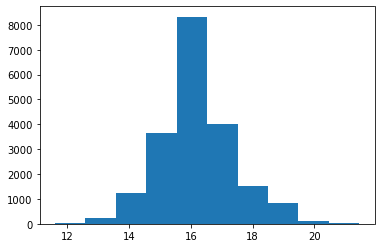

In [4]:
plt.hist(df['total_cost']);

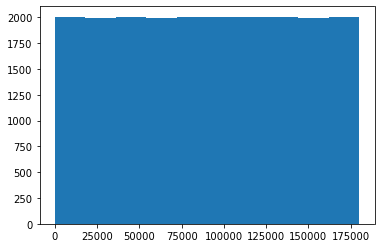

In [5]:
plt.hist(df['total_wip']);

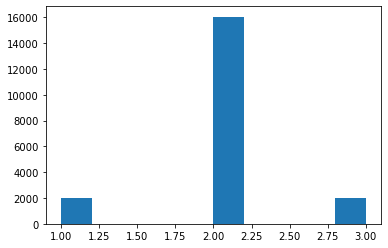

In [6]:
plt.hist(df['pd']);

## Second Excericise. Balanced flow according to machine D productivity

In [7]:
p = list()
pre_df = {}
#available work in process
wip_a = 1
wip_b = 1
wip_c = 1

for i in range(0,20000):

    #available capacities for each work station
    ca = np.random.choice(np.arange(4,9), p = [0.05, 0.1, 0.7, 0.1, 0.05])
    cb = np.random.choice(np.arange(6,9), p = [0.1, 0.8, 0.1])
    cc = np.random.choice(np.arange(2,6), p = [0.15, 0.7, 0.1, 0.05])
    cd = np.random.choice(np.arange(1,4), p = [0.1, 0.8, 0.1])
    
    #find the constraint
    pd = min(wip_c, wip_b, pd)
    
    #what must machine c do?
    if wip_c > 2*max(np.arange(1,4)):
        pc = 0
    elif wip_c <= max(np.arange(1,4)):
        pc = min(wip_a, cc)
    elif wip_c == 4:
        pc = min(2, wip_a, cc)
    elif wip_c == 5:
        pc = min(1, wip_a, cc)
    
    #what must machine b do?
    if wip_b > 2*max(np.arange(1,4)):
        pb = 0
    elif wip_b <= max(np.arange(1,4)):
        pb = min(3,cb)
    elif wip_b == 4:
        pb = 2
    elif wip_b == 5:
        pb = 1
       
    #what must machine a do?
    if wip_a > 2*max(np.arange(2,6)):
        pa = 0
    elif wip_a <= max(np.arange(2,6)):
        pa = min(5,ca)
    elif wip_a == 6:
        pa = min(4,ca)
    elif wip_a == 7:
        pa = min(3, ca)
    elif wip_a == 8:
        pa = min(2, ca)
    elif wip_a == 9:
        pa = min(1, ca)
        
    #all of the machines must produce according to the constraint
    
    #real output is pd
    pd = min(wip_c, wip_b, cd) #station d will produce according to work in porcess in b, c, or its own capacity, whichver is the lowest.
    
    wip_a = wip_a - pc + pa #new stock for station a
    wip_b = wip_b - pd + pb #new stock for station b
    wip_c = wip_c - pd + pc #new stock for station c
    total_wip = wip_a + wip_b + wip_c
        
    #machines operational costs
    cost_a = ga*pa
    cost_b = gb*pb
    cost_c = gc*pc
    cost_d = gd*pd
    total_cost = cost_a + cost_b + cost_c + cost_d
    
    p.append({'pa':pa, 'pb':pb, 'pc':pc, 'pd':pd, 'wip_a':wip_a, 'wip_b': wip_b, 'wip_c':wip_c,
             'cost_a':cost_a, 'cost_b':cost_b, 'cost_c':cost_c, 'cost_d':cost_d, 
             'total_cost': total_cost, 'total_wip' : total_wip})
df2 = pandas.DataFrame(p)
df2.head()

,pa,pb,pc,pd,wip_a,wip_b,wip_c,cost_a,cost_b,cost_c,cost_d,total_cost,total_wip
0,5,3,1,1,5,3,1,5,2.25,1.1,0.9,9.25,9
1,5,3,3,1,7,5,3,5,2.25,3.3,0.9,11.45,15
2,3,1,3,2,7,4,4,3,0.75,3.3,1.8,8.85,15
3,3,2,2,2,8,4,4,3,1.50,2.2,1.8,8.50,16
4,2,2,2,2,8,4,4,2,1.50,2.2,1.8,7.50,16


###### Exploring the results

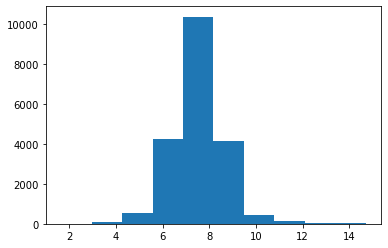

In [8]:
plt.hist(df2['total_cost']);

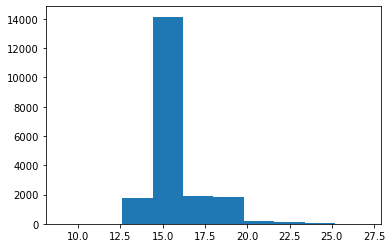

In [9]:
plt.hist(df2['total_wip']);

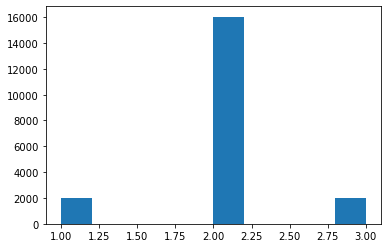

In [10]:
plt.hist(df2['pd']);

#### Creating one dataframe

In [11]:
df['flow'] = 'full capacity'
df2['flow'] = 'balanced flow'

In [12]:
test = df.append(df2)
test.head()

,pa,pb,pc,pd,wip_a,wip_b,wip_c,cost_a,cost_b,cost_c,cost_d,total_cost,total_wip,flow
0,8,7,1,1,8,7,1,8,5.25,1.1,0.9,15.25,16,full capacity
1,6,7,3,1,11,13,3,6,5.25,3.3,0.9,15.45,27,full capacity
2,5,7,3,2,13,18,4,5,5.25,3.3,1.8,15.35,35,full capacity
3,6,7,3,2,16,23,5,6,5.25,3.3,1.8,16.35,44,full capacity
4,6,7,3,2,19,28,6,6,5.25,3.3,1.8,16.35,53,full capacity


In [13]:
test['eff_a'] = test['pa']/8
test['eff_b'] = test['pb']/8
test['eff_c'] = test['pc']/5
test['eff_d'] = test['pd']/3
test.head()

,pa,pb,pc,pd,wip_a,wip_b,wip_c,cost_a,cost_b,cost_c,cost_d,total_cost,total_wip,flow,eff_a,eff_b,eff_c,eff_d
0,8,7,1,1,8,7,1,8,5.25,1.1,0.9,15.25,16,full capacity,1.000,0.875,0.2,0.333333
1,6,7,3,1,11,13,3,6,5.25,3.3,0.9,15.45,27,full capacity,0.750,0.875,0.6,0.333333
2,5,7,3,2,13,18,4,5,5.25,3.3,1.8,15.35,35,full capacity,0.625,0.875,0.6,0.666667
3,6,7,3,2,16,23,5,6,5.25,3.3,1.8,16.35,44,full capacity,0.750,0.875,0.6,0.666667
4,6,7,3,2,19,28,6,6,5.25,3.3,1.8,16.35,53,full capacity,0.750,0.875,0.6,0.666667


# Analysis and conclusions

In [14]:
test.pivot_table(columns = 'flow', aggfunc = 'mean')

flow,balanced flow,full capacity
cost_a,2.001350,6.000100
cost_b,1.500750,5.250563
cost_c,2.201100,3.355770
cost_d,1.800765,1.799100
eff_a,0.250169,0.750012
eff_b,0.250125,0.875094
eff_c,0.400200,0.610140
eff_d,0.666950,0.666333
pa,2.001350,6.000100
pb,2.001000,7.000750


For the same amount of output, which is pd, both mean work in process and mean total cost are lower when we balance the flow.<br>
Very important is the fact the individual efficiencies for all the machines, save but machine D of course, are lower when we balance the flow!

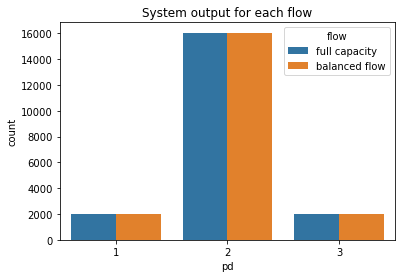

In [23]:
plt.title('System output for each flow')
sb.countplot(data = test, x = 'pd', hue = 'flow');

System's output is the same for both scenarios, meaning that we have balanced the flow correclty.

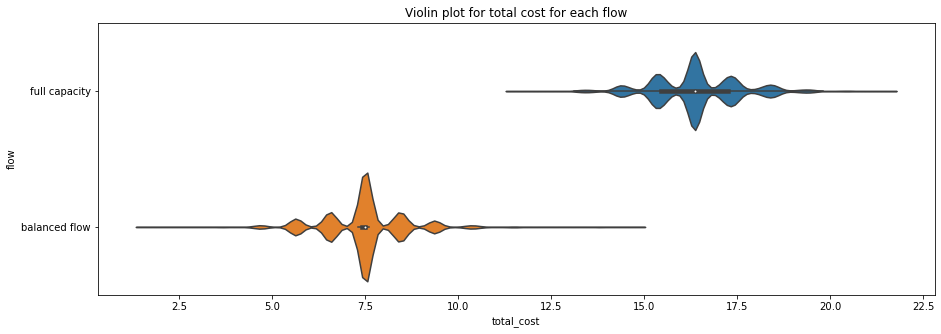

In [15]:
plt.figure(figsize = (15,5))
plt.title('Violin plot for total cost for each flow')
sb.violinplot(data = test, x = 'total_cost', y = 'flow');

Total cost is significantly lower when we balance the flow.

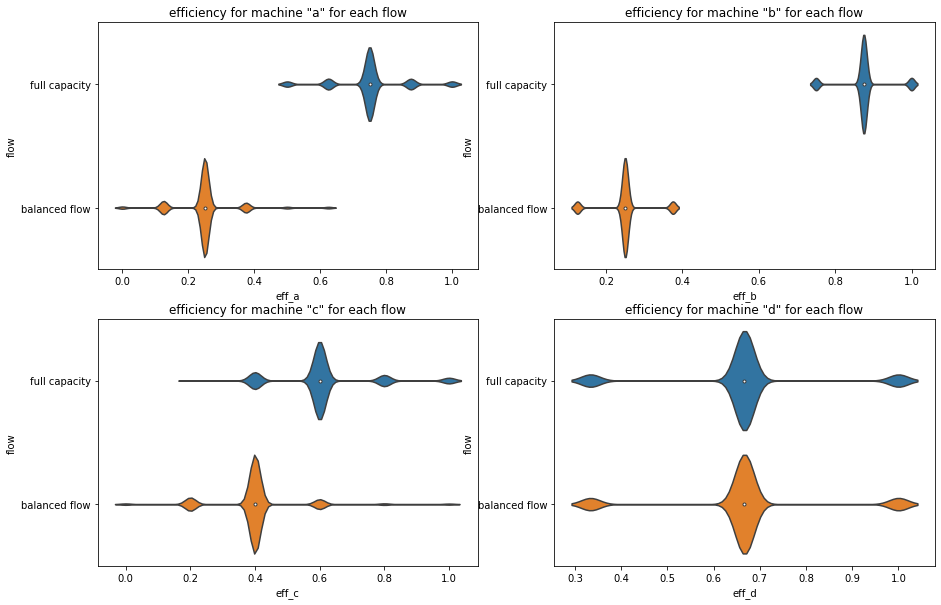

In [17]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.title('efficiency for machine "a" for each flow')
sb.violinplot(data = test, x = 'eff_a', y = 'flow')

plt.subplot(2,2,2)
plt.title('efficiency for machine "b" for each flow')
sb.violinplot(data = test, x = 'eff_b', y = 'flow')

plt.subplot(2,2,3)
plt.title('efficiency for machine "c" for each flow')
sb.violinplot(data = test, x = 'eff_c', y = 'flow')

plt.subplot(2,2,4)
plt.title('efficiency for machine "d" for each flow')
sb.violinplot(data = test, x = 'eff_d', y = 'flow');

Efficiencies for three of the machines are significantly lower when we balance the flow.<br>
This means that if Machine A manager receives a bonus for efficiency, we won't be happy at all! <br>

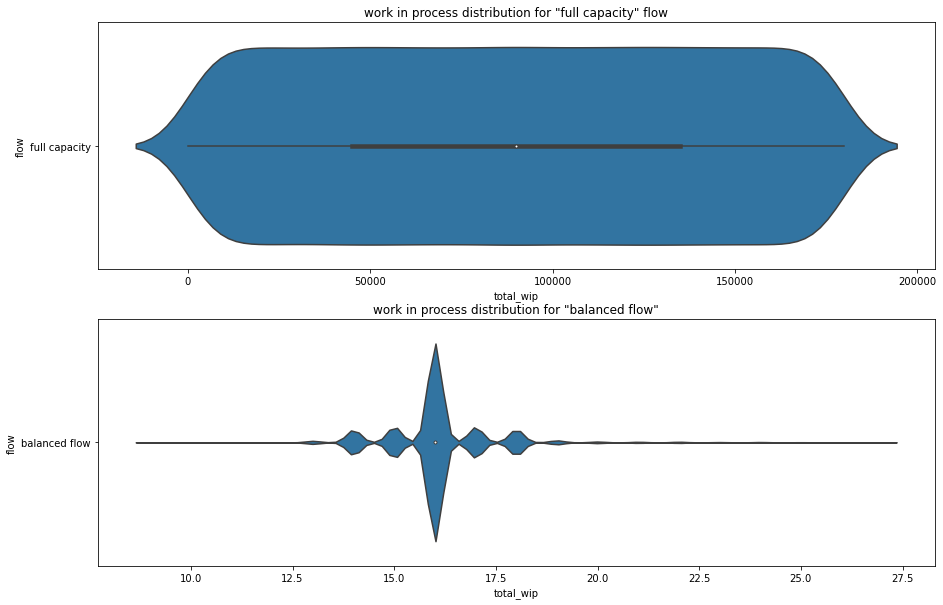

In [31]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
plt.title('work in process distribution for "full capacity" flow')
sb.violinplot(data = test.query('flow =="full capacity"'), x = 'total_wip', y = 'flow')

plt.subplot(2,1,2)
plt.title('work in process distribution for "balanced flow"')
sb.violinplot(data = test.query('flow == "balanced flow"'), x = 'total_wip', y = 'flow');

Difference in work in process is more than obvious.